In [1]:
## The issue for Mac Users...
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

print(tf.__version__)

2.0.0


In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boat']

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}" .format(num_train_examples))
print("Number of test examples: {}" .format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [5]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

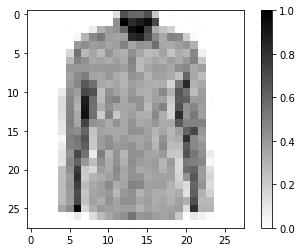

In [6]:
for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

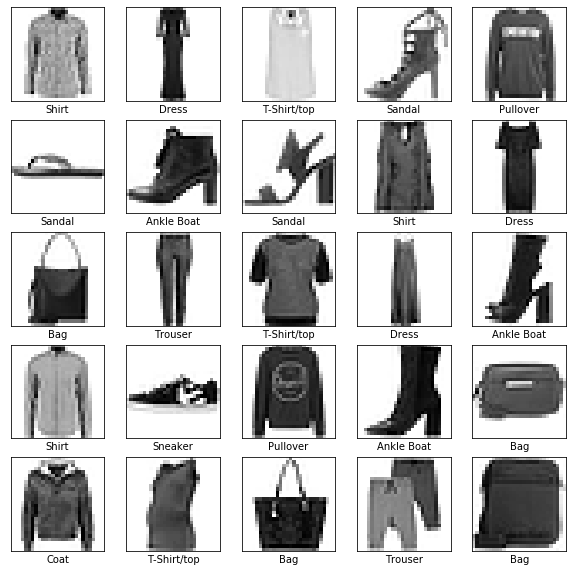

In [7]:
plt.figure(figsize=(10, 10))
i = 0

for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_name[label])
    i += 1

plt.show

In [8]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)

In [11]:
model.fit(
    train_dataset, 
    epochs=5, 
    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE)
)

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4040 - accuracy: 0.8545
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2590 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2160 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1829 - accuracy: 0.9335
Epoch 5/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1613 - accuracy: 0.9413
